# Thông tin sinh viên:
- Họ và tên: Nguyễn Thị Như Vân
- MSSV: 20520855

# Cài đặt thư viện

In [140]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import geopandas as gpd

In [143]:
import numpy as np
import rtree
import matplotlib.pyplot as plt
import folium
import osmnet
import geojson
import pygeos
import pandas as pd

# Clone data

In [144]:
!git clone https://github.com/CityScope/CSL_HCMC.git

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


# Load ranh giới quận huyện và dân số quận huyện

In [145]:
#load dữ liệu
data = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [146]:
#lấy mã tọa độ
print(data.crs)

epsg:32648


In [147]:
data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


# Load dữ liệu click của người dùng

In [148]:
click_data = gpd.read_file('/content/drive/My Drive/Colab Notebooks/click_data.json')

In [149]:
click_data.head()

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)


In [150]:
#lấy mã tọa độ
print(click_data.crs)

epsg:4326


In [151]:
#convert dữ liệu
click_data = click_data.to_crs(epsg=32648)

# Lọc ra 5 quận/huyện có tốc độ tăng mật độ dân số nhanh nhất (2019 và 2017)

In [152]:
data['TocDoTangMatDoDanSo'] = data['Pop_2019'] / data['Pop_2017']

In [153]:
dataTangMatDoDanSo = data.sort_values(by='TocDoTangMatDoDanSo', ascending=False).head(5)

In [154]:
#in kết quả
print("Top 5 quận/huyện có tốc độ tăng mật độ dân số lớn nhất\n")
print("Top \t Quận/Huyện \t Tốc Độ")

listDistTop5 = []

str_res = "#{} \t {} \t {:.2f}"
for i in range(len(dataTangMatDoDanSo)):
  listDistTop5.append(dataTangMatDoDanSo.iloc[i]['Dist_Name'])
  print(str_res.format(i + 1, dataTangMatDoDanSo.iloc[i]['Dist_Name'], dataTangMatDoDanSo.iloc[i]['TocDoTangMatDoDanSo']))

Top 5 quận/huyện có tốc độ tăng mật độ dân số lớn nhất

Top 	 Quận/Huyện 	 Tốc Độ
#1 	 District 9 	 1.28
#2 	 Hoc Mon 	 1.22
#3 	 Nha Be 	 1.16
#4 	 District 12 	 1.13
#5 	 District 2 	 1.11


# Dùng spatial join để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [155]:
from geopandas.tools import sjoin

In [156]:
click_data.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [157]:
click_data_top_5 = gpd.sjoin(click_data, dataTangMatDoDanSo)

In [158]:
click_data_top_5 = click_data_top_5[['geometry', 'Dist_Name']]

In [159]:
click_data_top_5

,geometry,Dist_Name
126,POINT (672111.261 1206262.526),Hoc Mon
525,POINT (671764.357 1203022.582),Hoc Mon
7264,POINT (680460.834 1205295.745),Hoc Mon
7964,POINT (675829.208 1198649.148),Hoc Mon
12190,POINT (676435.163 1201677.273),Hoc Mon
...,...,...
80506,POINT (688953.897 1193124.770),District 2
80913,POINT (691758.969 1194330.176),District 2
80925,POINT (692314.400 1193341.614),District 2
82068,POINT (690989.291 1192056.380),District 2


# Chạy KMeans cho top 5 quận huyện này, k=20

In [160]:
from sklearn.cluster import KMeans

In [161]:
import numpy as np

In [162]:
def convertGeometryToNumpyArray(geometryData):
  geometryData = geometryData.to_numpy()
  res = []
  for point in geometryData:
    res.append([point.x, point.y])
  return np.array(res)

In [163]:
def getKMeansMaxWithDist(data, dist):
  #lọc data theo quận
  temp_data = data.loc[data['Dist_Name'] == dist]
  #chạy KMeans
  X = convertGeometryToNumpyArray(temp_data['geometry'])
  kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
  #sắp xếp lấy label cao nhất
  listLabels = (kmeans.labels_).tolist()
  countLabels = [(i, listLabels.count(i)) for i in range(max(listLabels)+1)]
  countLabelsSorted = sorted(countLabels, key=lambda countLabels: countLabels[1], reverse=True)
  maxLabel = countLabelsSorted[0][0]
  #trả về giá trị max label count
  return kmeans, maxLabel

In [164]:
def getPredictKMeansLabel(kmeans, point):
  return kmeans.predict([[point.x, point.y]])[0]

In [165]:
def getClickDataWithDist(data, dist):
  temp_data = data.copy()
  #lọc data theo quận
  temp_data = temp_data.loc[data['Dist_Name'] == dist]
  #get kmean + max label
  kmeans, maxlabel = getKMeansMaxWithDist(temp_data, dist)
  #tính label
  temp_data['label'] = temp_data.apply(lambda x: getPredictKMeansLabel(kmeans, x['geometry']), axis=1)
  return temp_data.loc[temp_data['label'] == maxlabel][['geometry']]

In [166]:
listClickData = []
for distName in listDistTop5:
  listClickData.append(getClickDataWithDist(click_data_top_5, distName))

# Show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HeatMap

In [167]:
import folium
import shapely
from folium import plugins
from folium.plugins import HeatMap

In [168]:
point_centroid = shapely.geometry.polygon.Polygon(list(data['geometry'].to_crs(epsg=4326).apply(lambda polygon: polygon.centroid))).centroid

m = folium.Map(location=[point_centroid.y, point_centroid.x], zoom_start=10, tiles='CartoDB positron')
data_main = data.to_crs(epsg=4326)

#load ranh giới
for _, r in data_main.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)


heatData = []
for clickData in listClickData: 
  heatData += list(map(lambda point: (point.y, point.x), clickData.to_crs(epsg=4326)['geometry'].values))
HeatMap(heatData, radius=20).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))


In [169]:
m

# Lưu HeatMap thành file png

In [170]:
!pip install convertapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
path_html_file = '/content/drive/MyDrive/UIT/Lập trình Python cho Máy học/Images/result.html'
path_image_save = '/content//content/drive/MyDrive/UIT/Lập trình Python cho Máy học/Images/'
path_image_file = '/content/drive/MyDrive/UIT/Lập trình Python cho Máy học/Images/result.png'

In [172]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

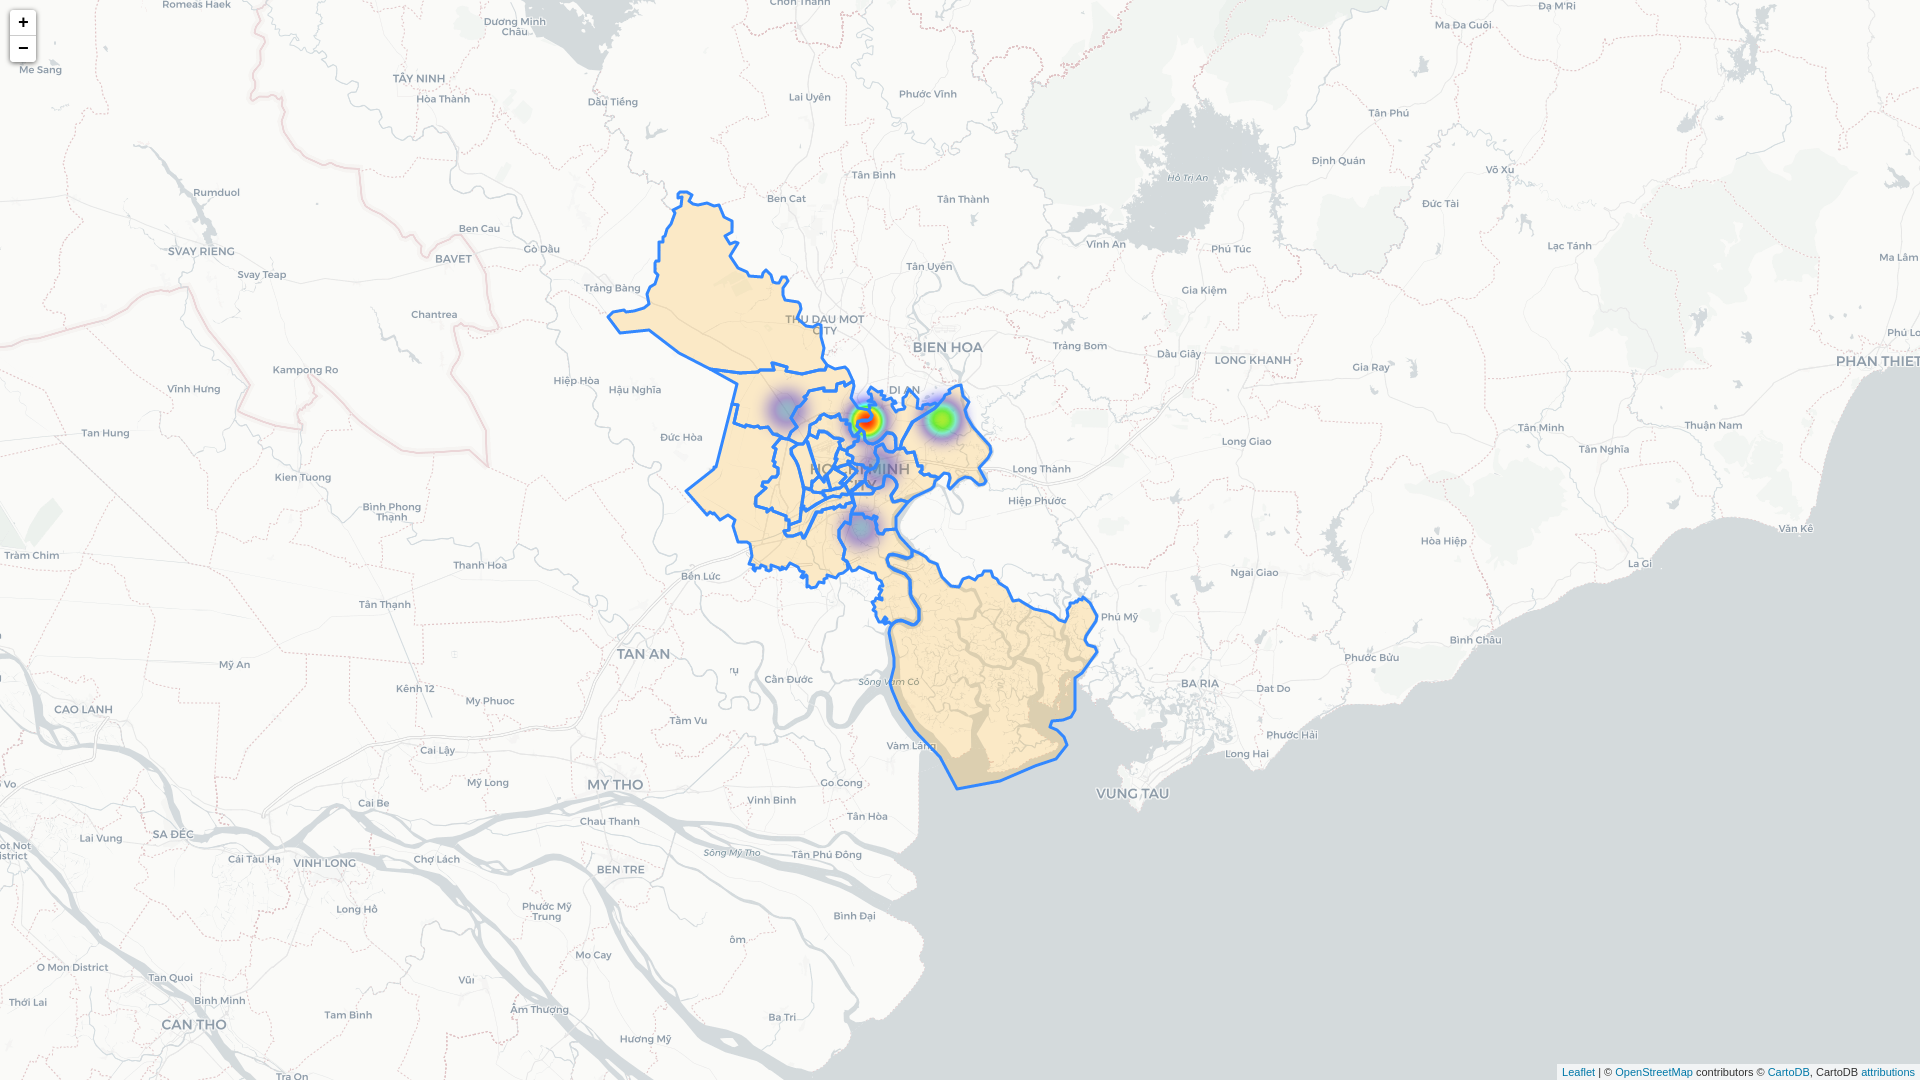

In [173]:
import os
import time
import sys
from selenium import webdriver
import cv2
from google.colab.patches import cv2_imshow

html_file = 'result.html'
image_file = 'result.png'
url = 'file://{}/{}'.format(os.getcwd(), html_file)

m.save(html_file)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome('chromedriver', options=options)
driver.get(url);

time.sleep(5)
driver.save_screenshot(image_file)
driver.quit()

cv2_imshow(cv2.imread(image_file))